In [1]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define transition matrix of Markov chain
P = np.array([[0.7, 0.3],[0.2, 0.8]])

In [3]:
def rot(p):
    return 2*np.arctan(np.sqrt(p/(1-p)))

rotations = np.array(list(map(rot, P)))

In [4]:
#one-step transistion of the Markov chain
#qreg represents the state of the chain
#anc = 1 if the chain jumps, and 0 otherwise
def transition_gate(qc, qreg, anc, creg, rotations):
    qc.x(qreg[0])
    qc.cry(rotations[0][1], qreg[0], anc[0])
    qc.x(qreg[0])
    qc.cry(rotations[1][0], qreg[0], anc[0])
    qc.cx(anc[0], qreg[0])
    qc.reset(anc[0])
    return qc

In [5]:
def compare_distributions(counts, distr):
    bins = list(counts.keys())
    bins.sort()
    vals = np.array([counts[b] for b in bins])
    p_hat = vals / sum(vals)
    x = np.arange(len(bins))  # the label locations
    width = 0.35
    fig, ax = plt.subplots()
    ax.bar(x - width/2, distr, width, label='true probabilities')
    ax.bar(x + width/2, p_hat, width, label='estimate')
    ax.set_xticks(x)
    ax.set_xticklabels(bins)
    ax.legend()
    fig.tight_layout()
    plt.show()

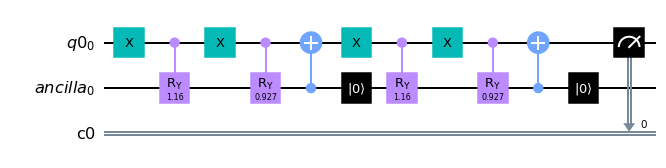

In [6]:
#setup quantum circuit
qreg = QuantumRegister(1)
anc = QuantumRegister(1, 'ancilla')
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, anc, creg)

#set initial value (0 or 1)
init = 0
if init == 1 : qc.x(qreg[0])
    
#choose number of steps to simulate
steps = 2

#apply simulation
for j in range(steps):
    qc = transition_gate(qc, qreg, anc, creg, rotations)

#measure result
qc.measure(qreg, creg)

#draw
qc.draw('mpl')

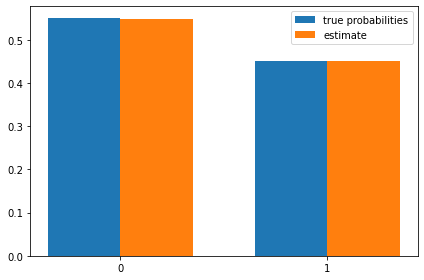

In [7]:
#run quantum cirquit and plot frequency comparison
backend = BasicAer.get_backend('qasm_simulator')
nsim = 2**16
res = execute(qc, backend, shots=nsim).result()
compare_distributions(res.get_counts(), np.linalg.matrix_power(P,steps)[init])